## Multiple Linear Regression (多重线性回归)




### Load the training data

In [24]:
# load the dataset
import pandas as pd
import numpy as np

# 一个经典的房价预测数据，由多个影响房价 Price 的因子组成
# Area Income, House Age, Rooms, Population, size
data = pd.read_csv("..//dataset//linear_regression//usa_housing_price.csv")
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,size,Price
0,79545.45857,5.317139,7.009188,23086.80050,188.214212,1.059034e+06
1,79248.64245,4.997100,6.730821,40173.07217,160.042526,1.505891e+06
2,61287.06718,5.134110,8.512727,36882.15940,227.273545,1.058988e+06
3,63345.24005,3.811764,5.586729,34310.24283,164.816630,1.260617e+06
4,59982.19723,5.959445,7.839388,26354.10947,161.966659,6.309435e+05


### 通过可视化手段观察数据的分布情况，了解各个特征数据/自变量和目标变量/因变量 (Price) 之间的分布情况

从图中可以看出，每个特征数据，跟目标变量之间都会有个“线性”的关系


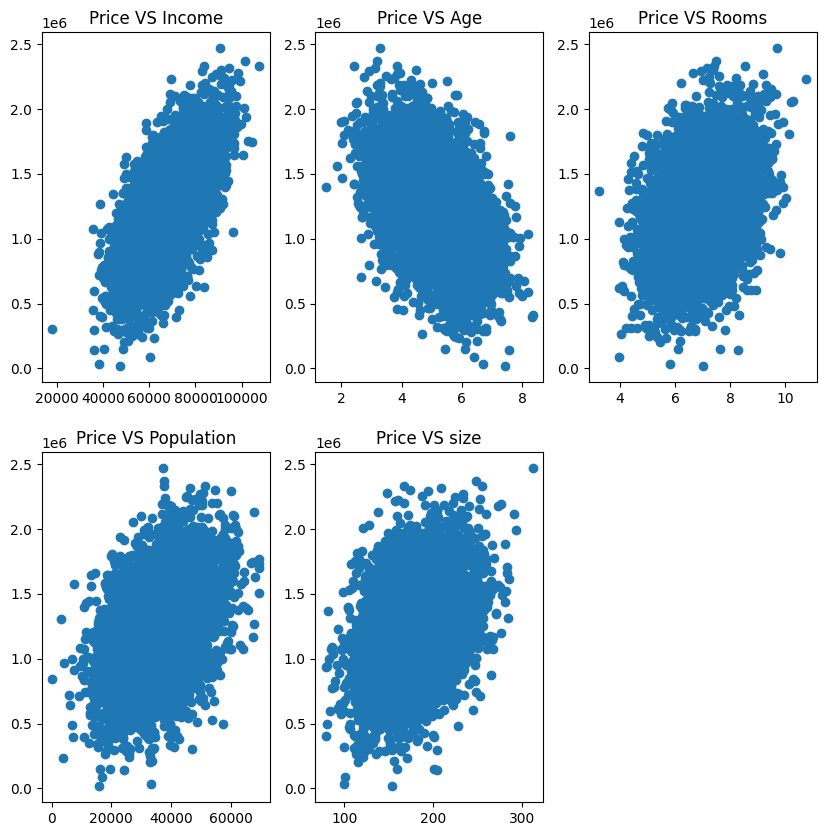

In [25]:
# matplotlib inline
from matplotlib import pyplot as plt

price = data.loc[:, "Price"]
income = data.loc[:, "Avg. Area Income"]
age = data.loc[:, "Avg. Area House Age"]
rooms = data.loc[:, "Avg. Area Number of Rooms"]
population = data.loc[:, "Area Population"]
size = data.loc[:, "size"]

fig = plt.figure(figsize=(10, 10))

fig1 = plt.subplot(231)
plt.scatter(income, price)
plt.title("Price VS Income")

fig2 = plt.subplot(232)
plt.scatter(age, price)
plt.title("Price VS Age")

fig3 = plt.subplot(233)
plt.scatter(rooms, price)
plt.title("Price VS Rooms")

fig4 = plt.subplot(234)
plt.scatter(population, price)
plt.title("Price VS Population")

fig5 = plt.subplot(235)
plt.scatter(size, price)
plt.title("Price VS size")

plt.show()

### 以Size为例，观察单个特征数据的预测准确度，设置单个特征数据/自变量（X）和 目标变量/因变量（y）

X 为 Size，y 为 price

In [26]:
# define X and Y
X = size
y = price
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [27]:
# 转成一维的数组
X = np.array(X).reshape(-1,1)

In [28]:
print(type(X))
print(X.shape)
print(X)

<class 'numpy.ndarray'>
(5000, 1)
[[188.2142121]
 [160.0425258]
 [227.2735445]
 ...
 [139.4917852]
 [184.845371 ]
 [148.5894227]]


### 建立以单因子简单线性回归模型，并以Size 和 Price 训练

In [29]:
# set up the linear regression model
from sklearn.linear_model import LinearRegression

lr_size = LinearRegression()
lr_size.fit(X, y)

LinearRegression()

In [30]:
lr_size.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

### 以原始的 Size 数据为特性数据，进行预测

In [31]:
# predict the price vs size
y_predict_1 = lr_size.predict(X);

In [32]:
print(type(y_predict_1))
print(y_predict_1.shape)
print(y_predict_1)


<class 'numpy.ndarray'>
(5000,)
[1276881.85636623 1173363.58767144 1420407.32457443 ... 1097848.86467426
 1264502.88144558 1131278.58816273]


### 通过 MSE 和 R2 评价预测的结果，发现模型的效果很差

In [33]:
# evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

mse_1 = mean_squared_error(y, y_predict_1)
r2_score_1 = r2_score(y, y_predict_1)

In [34]:
# mse 越小越好，r2 越接近1越好
# 实际上，mse 非常大，有12位数，r2只有0.12~0.13
print(mse_1, r2_score_1)

108771672553.6264 0.1275031240418234


### 绘制预测的线性结果，跟实际值比较，发现有很多点散落在预测直线较远的地方

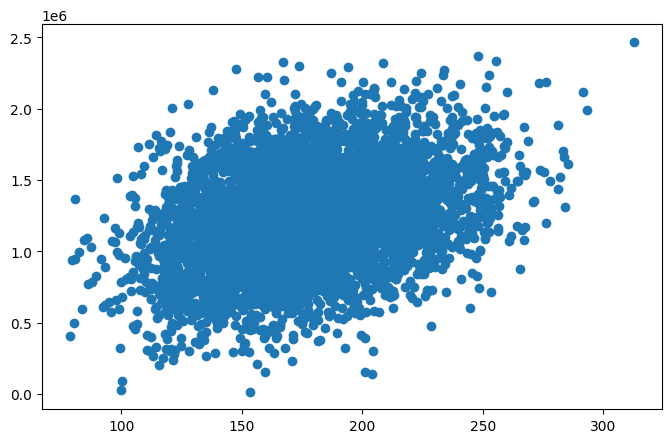

In [35]:
fig6 = plt.figure(figsize=(8,5))
plt.scatter(X, y)
# plt.plot(X, y_predict_1, 'r')
plt.show()

### 利用 200 作为输入因子预测，观察得出结果跟实际值的偏差

预测结果：1,320,189.32279261，跟实际值差异比较大
实际值：分布在 400,000 到 2,000,000 之间

In [36]:
X_test = [200]
X_test = np.array(X_test).reshape(1, -1)
print(X_test)
y_test_predict = lr_size.predict(X_test)
print(y_test_predict)

[[200]]
[1320189.32279261]


### 建立多重线性回归模型，考虑更多维度的特征数据

In [37]:
# define x_multi
X_multi = data.drop(['Price'], axis = 1)
X_multi.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,size
0,79545.45857,5.317139,7.009188,23086.80050,188.214212
1,79248.64245,4.997100,6.730821,40173.07217,160.042526
2,61287.06718,5.134110,8.512727,36882.15940,227.273545
3,63345.24005,3.811764,5.586729,34310.24283,164.816630
4,59982.19723,5.959445,7.839388,26354.10947,161.966659


In [38]:
print(type(X_multi))
print(X_multi.shape)

<class 'pandas.core.frame.DataFrame'>
(5000, 5)


### 同样使用sklearn 的 LinearRegression 创建一个模型并训练，但是输入参数是多个因子，形成一个多重线性回归模型

In [39]:
# set up 2nd linear regression model
lr_multi = LinearRegression();
# train the model
lr_multi.fit(X_multi, y)

LinearRegression()

In [40]:
lr_multi.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

### 基于多个特征数据预测

In [41]:
y_predict_multi = lr_multi.predict(X_multi);
print(y_predict_multi)

[1223968.89166086 1497306.3318863  1250884.31019437 ... 1020693.92390376
 1260503.36914585 1302737.7915763 ]


### 通过 MSE 和 R2 评价预测的结果，发现模型的效果较好

mse 有 11 位数，降了一个数量级
r2 在0.91和0.92之间，比 0.12 提升很多

In [42]:
mse_multi = mean_squared_error(y, y_predict_multi)
r2_score_multi = r2_score(y, y_predict_multi)
print(mse_multi, r2_score_multi)

10219846512.17786 0.9180229195220739


### 通过散点图观察预测的Price 和 真实 Price 之间的关系集中在一个直线周围

对比单因子的预测结果，明显发现多因子的效果要好很多

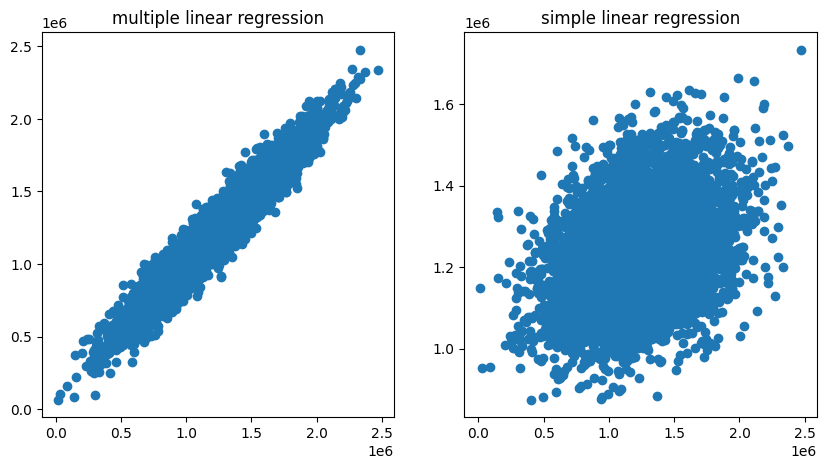

In [43]:
fig7 = plt.figure(figsize=(10, 5))

fig7 = plt.subplot(1, 2, 1)
plt.scatter(y, y_predict_multi)
plt.title("multiple linear regression")

fig7 = plt.subplot(1, 2, 2)
plt.title("simple linear regression")
fig7 = plt.scatter(y, y_predict_1)

plt.show()

### 除了 size 是200，再增加更多的特征数据预测

In [44]:
X_test = [[65000, 5, 5, 30000, 200]]

X_test_df = pd.DataFrame(
    X_test,
    columns=[
        "Avg. Area Income",
        "Avg. Area House Age",
        "Avg. Area Number of Rooms",
        "Area Population",
        "size",
    ],
)

print(X_test_df)

   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0             65000                    5                          5   

   Area Population  size  
0            30000   200  


In [45]:
y_test_predict = lr_multi.predict(X_test_df)

### 验证预测的结果，与单因子的Simple Linear Regression 比较，准确很多

预测结果是：817,052，预测的较为精准
实际值是：800,000 到 1,200,000 之间

In [46]:
print(y_test_predict)

[817052.19516298]
